# Best Pittsburgh Neighborhood — Economic Advantage Score (EAS)

To analyze the best neighborhood in Pittsburgh, I created an **Economic Advantage Score** that compares each neighborhood's **aggregate household income** to the **average U.S. household income** ($74,580). This can create a general image of which neighborhoods have stronger financial resources overall. 

In this scenario, a higher score means the neighborhood's total income is higher compared to the U.S. average, which can reflect strong economic well-being.

In [7]:
# Rename long ACS column names
df = df.rename(columns={
    "Estimate; Aggregate household income in the past 12 months (in 2014 Inflation-adjusted dollars)": "Aggregate_Income",
    "Margin of Error; Aggregate household income in the past 12 months (in 2014 Inflation-adjusted dollars)": "MoE_Aggregate_Income"
})

# Convert numeric columns to numbers
df["Aggregate_Income"] = pd.to_numeric(df["Aggregate_Income"].astype(str).str.replace(",", ""), errors="coerce")

# U.S. average household income constant
US_AVG_INCOME = 74580

# Compute score
df["Economic_Advantage_Score"] = df["Aggregate_Income"] / US_AVG_INCOME

# Rank neighborhoods
ranked = df.sort_values("Economic_Advantage_Score", ascending=False).reset_index(drop=True)

# Show top 10
ranked.head(10)


,Neighborhood,Id,Aggregate_Income,MoE_Aggregate_Income,Economic_Advantage_Score
0,Squirrel Hill South,78,639717500.0,55105248.88,8577.601234
1,Shadyside,69,597347500.0,63123196.01,8009.486457
2,Squirrel Hill North,77,561576600.0,63708211.63,7529.855189
3,Brookline,14,361244500.0,34273834.17,4843.718155
4,Point Breeze,64,299866100.0,32033559.8,4020.730759
5,Mount Washington,54,263764100.0,23388926.99,3536.659962
6,Bloomfield,10,243725500.0,19774185.15,3267.973988
7,South Side Flats,73,240068000.0,29292476.83,3218.932690
8,Greenfield,37,235978800.0,25966033.36,3164.102977
9,Carrick,16,221566800.0,27495885.3,2970.860821


This table shows the **top neighborhoods** with the highest Economic Advantage Scores. These neighborhoods have the strongest total income compared to the U.S. average. 

Here is the table in a graph-format:

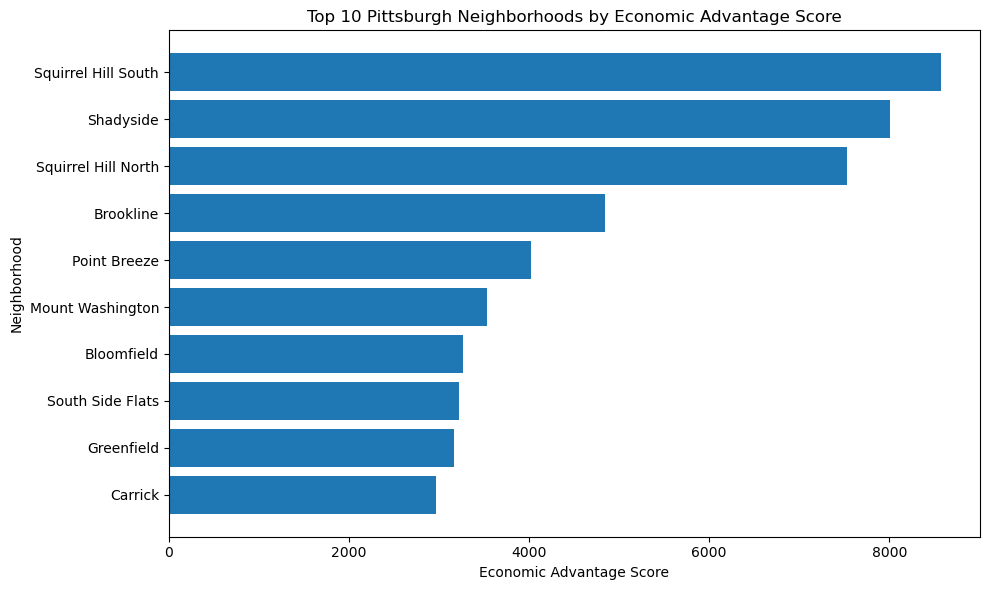

In [8]:
top10 = ranked.loc[:9, ["Neighborhood", "Economic_Advantage_Score"]]

plt.figure(figsize=(10, 6))
plt.barh(top10["Neighborhood"], top10["Economic_Advantage_Score"])
plt.xlabel("Economic Advantage Score")
plt.ylabel("Neighborhood")
plt.title("Top 10 Pittsburgh Neighborhoods by Economic Advantage Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Conclusion

In this project, I measured the economic strength of each Pittsburgh neighborhood using 

### Easy-to-understand formula:
**Economic Advantage Score = Neighborhood's Total Income ÷ U.S. Average Household Income**

This tells us how many “units” of the average U.S. household income exist within a neighborhood’s total income.  
For example, a score of 8,000 means the neighborhood’s total income is roughly equal to the income of **8,000 average U.S. households** combined.

Using this calculation, the neighborhood with the **highest Economic Advantage Score**, and therefore the strongest overall financial resources, is:

**Squirrel Hill South**

(This is the first neighborhood shown in your ranked table.)

This score suggests that **Squirrel Hill South** has the highest total income relative to all other neighborhoods, meaning it may have more financial resources, greater economic activity, and potentially more opportunities for residents.

While this metric only measures the economic perspective, combining it with other factors (like safety, walkability, or green space) would provide a more complete picture of the “best” neighborhood in Pittsburgh.
